In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import time
import os
import seaborn as sns

In [2]:
df = pd.read_csv("./data/definitivo.csv")
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   municipio           1113 non-null   int64  
 1   tipo_vivienda       1113 non-null   int64  
 2   habitaciones        1113 non-null   float64
 3   metros_cuadrados    1113 non-null   float64
 4   aseos               1113 non-null   float64
 5   planta              1113 non-null   float64
 6   garaje              1113 non-null   int64  
 7   zona_centro         1113 non-null   int64  
 8   ascensor            1113 non-null   int64  
 9   piscina             1113 non-null   int64  
 10  reformado           1113 non-null   int64  
 11  terraza             1113 non-null   int64  
 12  aire_acondicionado  1113 non-null   int64  
 13  precio              1113 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 121.9 KB


## En este notebook se realizará la predicción del precio de la vivienda con el modelo **DecisionTreeRegressor**:

### ***Es un único árbol de decisión***. Divide el espacio de datos en regiones utilizando condiciones basadas en las features. 

### ***Cada rama del árbol representa una condición, y las hojas contienen los valores predichos*** (generalmente, la media de los valores en esa región).

#### + **Ventaja**: Simple y rápido de entrenar.
#### - **Desventaja**: Tiende a sobreajustarse al entrenamiento (overfitting), especialmente con datasets pequeños.

## Es muy propenso al **sobreajuste**, especialmente en datasets pequeños o con ruido. Cada pequeña variación en los datos puede cambiar la estructura del árbol.

In [3]:
df.describe() # Mostramos datos estadisticos descriptivos y nos fijamos principalmente en la media.

,municipio,tipo_vivienda,habitaciones,metros_cuadrados,aseos,planta,garaje,zona_centro,ascensor,piscina,reformado,terraza,aire_acondicionado,precio
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.00000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.00000,1.113000e+03
mean,1.762803,3.601977,3.393531,172.386343,1.977538,2.10602,0.197664,0.234501,0.080863,0.018868,0.000898,0.115903,0.01168,3.024951e+05
std,1.043729,1.784898,1.221669,137.437768,0.781093,1.92005,0.398416,0.423877,0.272746,0.136120,0.029975,0.320252,0.10749,2.699383e+05
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.180000e+04
25%,1.000000,2.000000,3.000000,88.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.390000e+05
50%,1.000000,5.000000,3.000000,116.000000,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.200000e+05
75%,3.000000,5.000000,4.000000,210.000000,2.000000,3.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.500000e+05
max,5.000000,6.000000,11.000000,961.000000,11.000000,15.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.000000e+06


<Axes: >

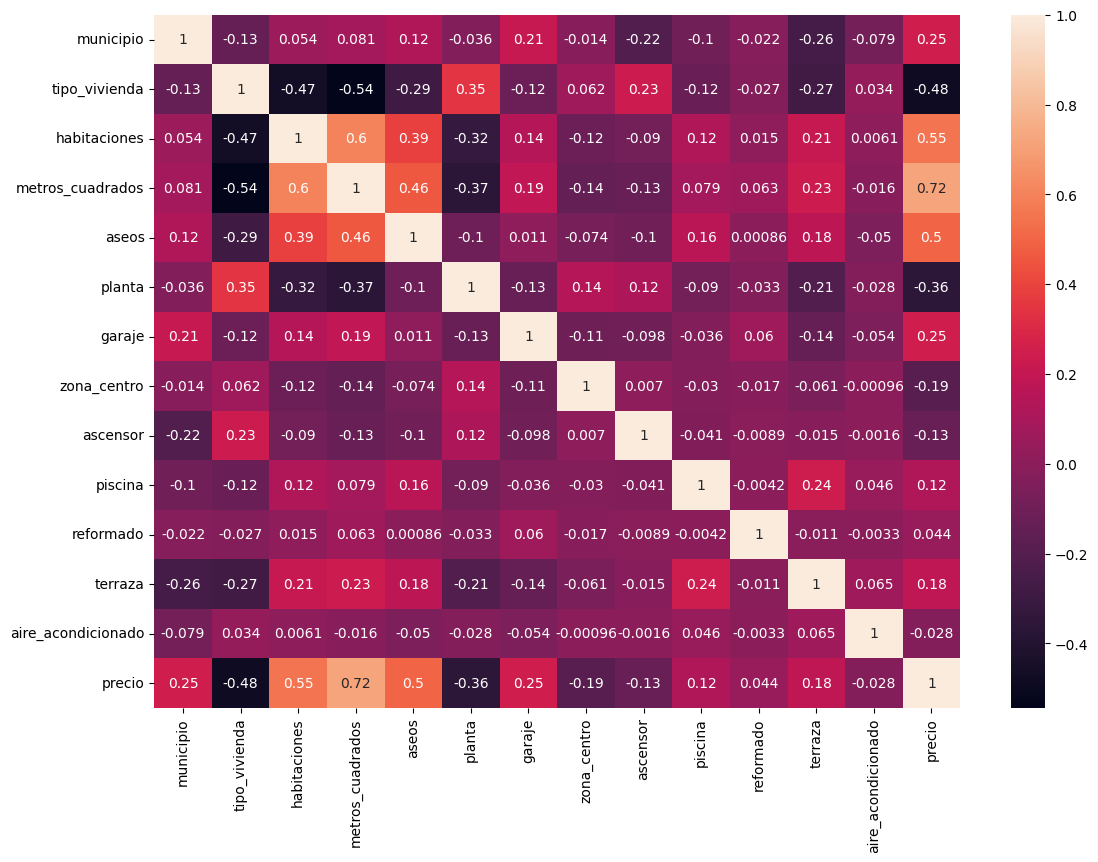

In [4]:
fig = plt.figure(figsize=(13,9))
sns.heatmap(df.corr(), annot=True) # Vemos las correlaciones importantes

### Decision Tree **no se ve afectado significativamente por la multicolinealidad.** Esto se debe a cómo funciona el modelo.

<Axes: xlabel='precio', ylabel='Count'>

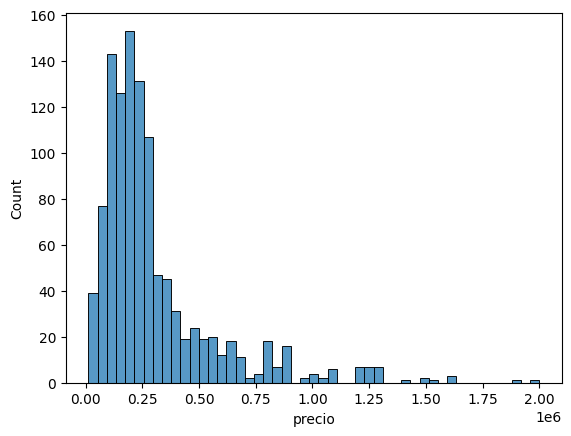

In [5]:
sns.histplot(df["precio"])

## Transformación logarítmica

### En **Decision Tree** no es necesario realizar una transformación logarítmica** del target ni de las características, ya que este modelo **no asume relaciones lineales ni distribuciones específicas en los datos**, de hecho se ha podido comprobar que es peor todavía. A los modelos como este no le afectan los outliers.

## Normalización

### **Tampoco requiere normalización**. A diferencia de modelos como Regresión Lineal, Random Forest **no es sensible a la escala de las variables**. 


Total shape: (1104, 13)
Train features shape (X): (883, 13)
Train target shape (y): (883,)
Test features shape (X): (221, 13)
Test target shape (y): (221,)

-----------> MAE: 98855.62233644309
-----------> MAPE: 0.4489776143489269
-----------> RMSE: 173856.50052981635
-----------> R2: 0.5742929786345701

 DecisionTreeRegressor(max_depth=10, random_state=100)


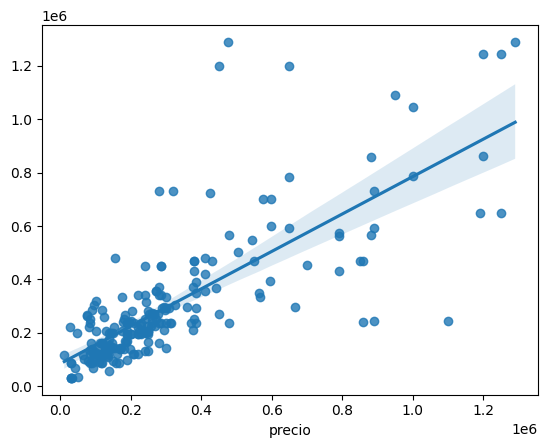

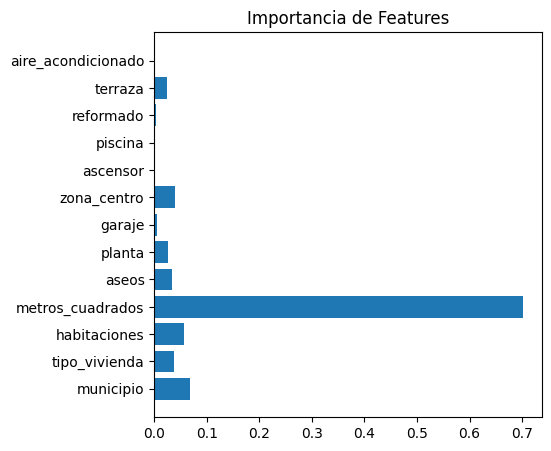

In [26]:
from sklearn.model_selection import train_test_split 

# Las columnas de las features (X)

X = df[['municipio', 'tipo_vivienda', 'habitaciones', 'metros_cuadrados',
       'aseos', 'planta', 'garaje', 'zona_centro', 'ascensor', 'piscina',
       'reformado', 'terraza', 'aire_acondicionado']]

# La columna del target (y)
y = df["precio"]

# Dividimos
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, random_state=42) 

print("Total shape:", X.shape)
print("Train features shape (X):", X_train.shape)
print("Train target shape (y):", y_train.shape)
print("Test features shape (X):", X_test.shape)
print("Test target shape (y):", y_test.shape)
print()


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

dtr = DecisionTreeRegressor(max_depth=10,
                            random_state=100)
# Entrena el modelo
dtr.fit(X_train, y_train)

# Predicciones
y_pred = dtr.predict(X_test)

# Métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("-----------> MAE:", mae)
print("-----------> MAPE:", mape)
print("-----------> RMSE:", rmse)
print("-----------> R2:", r2)

# Parámetros
print("\n",dtr.set_params())

# Visualización
sns.regplot(x=y_test, y=y_pred)

plt.figure(figsize=(5,5))
importances = dtr.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.title("Importancia de Features")
plt.show()

## Vamos a preparar **código para observar outliers**, *posiblemente eliminarlos* y hacer pruebas para ver si mejoran las métricas del modelo sin ellos:

In [11]:
pd.set_option('display.float_format', '{:.2f}'.format) # Para mostrar los numeros completos sin anotacion cientifica

df["precio"].describe()

count      1113.00
mean     302495.07
std      269938.34
min       11800.00
25%      139000.00
50%      220000.00
75%      350000.00
max     2000000.00
Name: precio, dtype: float64

#### Detectamos los valores fuera del rango de los quartiles

In [12]:
Q1 = df["precio"].quantile(0.25)  # Primer cuartil (25%)
Q3 = df["precio"].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1  # Rango intercuartílico

# Límites para detectar outliers
lower_bound = max(0, Q1 - 1.5 * IQR)  # Ajustar límite inferior a 0 si es negativo
upper_bound = Q3 + 1.5 * IQR

print(f"Valores fuera de los límites: < {lower_bound} o > {upper_bound}")

# Filtrar outliers
outliers = df[df["precio"] > upper_bound]
print(f"Cantidad de outliers detectados: {len(outliers)}")

Valores fuera de los límites: < 0 o > 666500.0
Cantidad de outliers detectados: 101


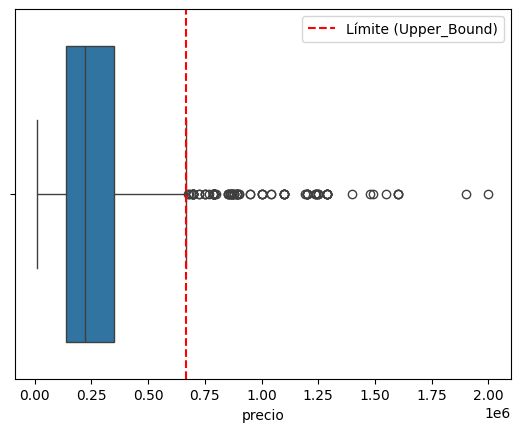

In [13]:
sns.boxplot(x=df["precio"])
plt.axvline(upper_bound, color='r', linestyle='--', label='Límite (Upper_Bound)')
plt.legend()
plt.show()

#### En caso de eliminarlos, ejecutar la siguiente celda para ajustar el limite de los outliers

Límite superior: 666500.0
Límite superior definitivo a filtrar: 1333000.0
Cantidad de outliers detectados ajustados: 9


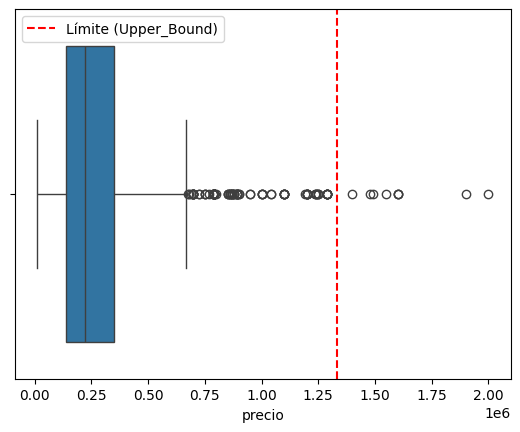

In [17]:
tolerancia = 1 # Incrementa el límite superior del upper_bound (ajusta según tu criterio)
upper_bound_ajustado = upper_bound + (tolerancia * upper_bound)
print(f"Límite superior: {upper_bound}")
print(f"Límite superior definitivo a filtrar: {upper_bound_ajustado}")

# # Filtrar outliers
outliers = df[df["precio"] > upper_bound_ajustado]
print(f"Cantidad de outliers detectados ajustados: {len(outliers)}")

# # Visualizar
sns.boxplot(x=df["precio"])
plt.axvline(upper_bound_ajustado, color='r', linestyle='--', label='Límite (Upper_Bound)')
plt.legend()
plt.show()

#### Eliminamos

In [18]:
# # Filtrar los datos en el df con el límite ajustado
print(f"Cantidad de datos antes de eliminar outliers: {len(df)}")
df = df[df["precio"] <= upper_bound_ajustado]
print(f"Cantidad de datos después de eliminar outliers: {len(df)}")

Cantidad de datos antes de eliminar outliers: 1113
Cantidad de datos después de eliminar outliers: 1104


### **Probamos de nuevo sin los outliers**, si no mejora volvemos al estado anterior en el dataframe, si mejora continuamos!

### TESTER 1 (Sólo modelo)

Total shape: (1104, 13)
Train features shape (X): (883, 13)
Train target shape (y): (883,)
Test features shape (X): (221, 13)
Test target shape (y): (221,)

-----------> MAE: 84467.19888862735
-----------> MAPE: 0.4161373199098213
-----------> RMSE: 130723.45734618168
-----------> R2: 0.7593222200640737

 DecisionTreeRegressor(max_depth=5, random_state=100)


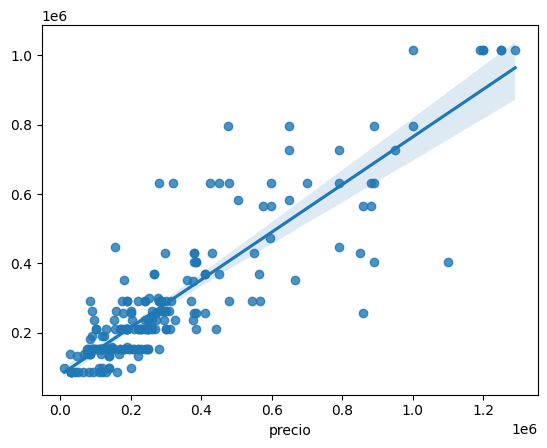

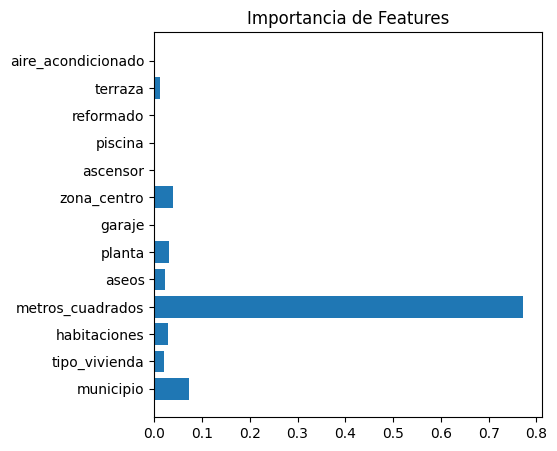

In [27]:
from sklearn.model_selection import train_test_split 

# Las columnas de las features (X)

X = df[['municipio', 'tipo_vivienda', 'habitaciones', 'metros_cuadrados',
       'aseos', 'planta', 'garaje', 'zona_centro', 'ascensor', 'piscina',
       'reformado', 'terraza', 'aire_acondicionado']]

# La columna del target (y)
y = df["precio"]

# Dividimos
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, random_state=42) 

print("Total shape:", X.shape)
print("Train features shape (X):", X_train.shape)
print("Train target shape (y):", y_train.shape)
print("Test features shape (X):", X_test.shape)
print("Test target shape (y):", y_test.shape)
print()


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

dtr = DecisionTreeRegressor(max_depth=5,
                            random_state=100)
# Entrena el modelo
dtr.fit(X_train, y_train)

# Predicciones
y_pred = dtr.predict(X_test)

# Métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("-----------> MAE:", mae)
print("-----------> MAPE:", mape)
print("-----------> RMSE:", rmse)
print("-----------> R2:", r2)

# Parámetros
print("\n",dtr.set_params())

# Visualización
sns.regplot(x=y_test, y=y_pred)

plt.figure(figsize=(5,5))
importances = dtr.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.title("Importancia de Features")
plt.show()

### **Mejora sin outliers!**

### Pero vamos a probar a ***optimizar DecissionTreeRegressor()*** con **GridSearchCV**, ya que te permite probar diferentes combinaciones de hiperparámetros automáticamente.

### TESTER 2 (GridSearchCV)

In [37]:
from sklearn.model_selection import train_test_split 

# Las columnas de las features (X)

X = df[['municipio', 'tipo_vivienda', 'habitaciones', 'metros_cuadrados',
       'aseos', 'planta', 'garaje', 'zona_centro', 'ascensor', 'piscina',
       'reformado', 'terraza', 'aire_acondicionado']]

# La columna del target (y)
y = df["precio"]

# Dividimos
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, random_state=42) 

print("Total shape:", X.shape)
print("Train features shape (X):", X_train.shape)
print("Train target shape (y):", y_train.shape)
print("Test features shape (X):", X_test.shape)
print("Test target shape (y):", y_test.shape)
print()

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer

# Definir los hiperparámetros a probar
param_grid = {
    'max_depth': [8, 10, 12],
    'min_samples_leaf': [1, 3, 4],
    'min_samples_split': [13, 15, 20]
}

# Crear el modelo
dtr = DecisionTreeRegressor(random_state=100)

# GridSearchCV para MSE
grid_search = GridSearchCV(dtr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# # GridSearchCV para R2 Score
grid_search_r2 = GridSearchCV(dtr, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_r2.fit(X_train, y_train)

# Mejor modelo y MSE
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_  # Convertir a positivo
best_rmse = best_mse ** 0.5  # Calcular RMSE

print("Éstas métricas reflejan cómo el modelo generaliza en los subconjuntos de validación durante el proceso de ajuste""\n"
      "pero no está directamente relacionado con el conjunto de prueba final.\n")

print("Mejores parámetros del modelo para MSE y RMSE:", best_params) # Directamente del GridSearchCV para MSE
print("MSE:", best_mse) # Directamente del GridSearchCV para MSE
print("RMSE:", best_rmse) # Directamente del GridSearchCV para MSE

print("Mejores parámetros para R²:", grid_search_r2.best_params_) # Directamente del GridSearchCV para R2 Score
print("Mejor R²:", grid_search_r2.best_score_)  # Directamente del GridSearchCV para R2 Score

print("---"*50)

print("\nAquí ya EVALÚA EL DESEMPEÑO FINAL DEL MODELO en datos completamente nuevos, que es lo que realmente importa en un entorno de producción.\n")
# Usa los mejores parámetros para entrenar el modelo y calcular R² y RMSE
best_model = grid_search.best_estimator_  # Modelo con los mejores parámetros
y_pred = best_model.predict(X_test) # Realizando predicciones sobre test real directamente del GridSearchCV para MSE

# Métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = best_model.score(X_test, y_test)  # Representa el desempeño del modelo final en datos completamente nuevos, que es lo que realmente importa en un entorno de producción.

print("Mejores desempeño final para MSE, RMSE y R²:",best_model)
print("-----------> MAE:", mae)
print("-----------> MAPE:", mape)
print("-----------> RMSE:", rmse)
print("-----------> R2:", r2)

Total shape: (1104, 13)
Train features shape (X): (883, 13)
Train target shape (y): (883,)
Test features shape (X): (221, 13)
Test target shape (y): (221,)

Éstas métricas reflejan cómo el modelo generaliza en los subconjuntos de validación durante el proceso de ajuste
pero no está directamente relacionado con el conjunto de prueba final.

Mejores parámetros del modelo para MSE y RMSE: {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 20}
MSE: 21931844804.823128
RMSE: 148094.04040954224
Mejores parámetros para R²: {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 20}
Mejor R²: 0.5999207534491411
------------------------------------------------------------------------------------------------------------------------------------------------------

Aquí ya EVALÚA EL DESEMPEÑO FINAL DEL MODELO en datos completamente nuevos, que es lo que realmente importa en un entorno de producción.

Mejores desempeño final para MSE, RMSE y R²: DecisionTreeRegressor(max_depth=12, mi

### Ahora, vamos a practicar con otra herramienta ***para obtener los mejores parametros del modelo DecisionTreeRegressor()***. 
### Se llama **BaggingRegressor** para entrenar múltiples árboles de decisión con subconjuntos de los datos.

### TESTER 3 (Bagging)

***(Bagging + Decision Tree Regressor)*** = Random Forest Regressor

In [44]:
from sklearn.model_selection import train_test_split 

# Las columnas de las features (X)

X = df[['municipio', 'tipo_vivienda', 'habitaciones', 'metros_cuadrados',
       'aseos', 'planta', 'garaje', 'zona_centro', 'ascensor', 'piscina',
       'reformado', 'terraza', 'aire_acondicionado']]

# La columna del target (y)
y = df["precio"]

# Dividimos
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, random_state=42) 

print("Total shape:", X.shape)
print("Train features shape (X):", X_train.shape)
print("Train target shape (y):", y_train.shape)
print("Test features shape (X):", X_test.shape)
print("Test target shape (y):", y_test.shape)
print()

from sklearn.ensemble import BaggingRegressor

# Modelo SENCILLO Bagging con DecisionTreeRegressor como base
bagging = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=100),
                           n_estimators=50,
                           random_state=100,
                           n_jobs=-1)

# Entrena el modelo
bagging.fit(X_train, y_train)

# Predicciones
y_pred = bagging.predict(X_test)

# Evaluación
from sklearn.metrics import mean_squared_error, r2_score
print(bagging,"\n")

# Métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("-----------> MAE:", mae)
print("-----------> MAPE:", mape)
print("-----------> RMSE:", rmse)
print("-----------> R2:", r2)

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=100),
                 n_estimators=50, n_jobs=-1, random_state=100) 

-----------> MAE: 74136.99075888816
-----------> MAPE: 0.36568393096857327
-----------> RMSE: 120266.82164187422
-----------> R2: 0.7962861233449021


### Mejor, pero vamos a ***fusionar GridSearchCV*** y ***BaggingRegressor*** para probar múltiples combinaciones de parámetros y que puedan ajustarse mejor las métricas.

### TESTER 4 (GridSearchCV + Bagging)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Mejores parámetros: {'bootstrap': False, 'estimator__max_depth': 10, 'max_features': 0.75, 'max_samples': 0.75, 'n_estimators': 100}
-----------> MAE: 81284.74729442566
-----------> MAPE: 0.4030027746137773
-----------> RMSE: 131250.27166518677
-----------> R2: 0.757378452822662


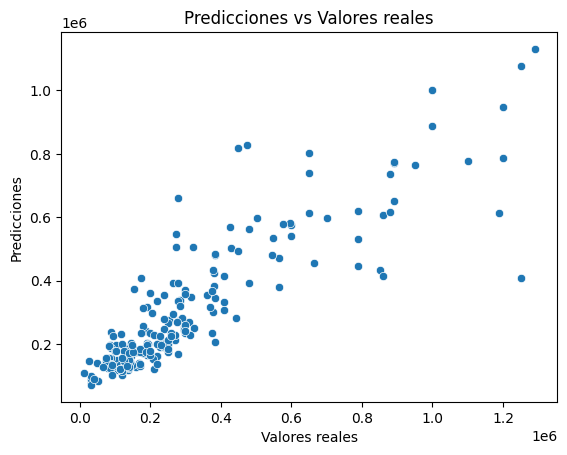

In [46]:
from sklearn.model_selection import train_test_split 

# Las columnas de las features (X)

X = df[['municipio', 'tipo_vivienda', 'habitaciones', 'metros_cuadrados',
       'aseos', 'planta', 'garaje', 'zona_centro', 'ascensor', 'piscina',
       'reformado', 'terraza', 'aire_acondicionado']]

# La columna del target (y)
y = df["precio"]

# Dividimos
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, random_state=42) 

print("Total shape:", X.shape)
print("Train features shape (X):", X_train.shape)
print("Train target shape (y):", y_train.shape)
print("Test features shape (X):", X_test.shape)
print("Test target shape (y):", y_test.shape)
print()

from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Configura el BaggingRegressor con un DecisionTreeRegressor como base
bagging = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),  # Modelo base inicial
    random_state=100,  # Para reproducibilidad
    n_jobs=-1  # Paralelización
)

# Define el rango de parámetros para optimizar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
    'bootstrap': [True, False],
    'estimator__max_depth': [None, 5, 10]  # Profundidad máxima del árbol base
}

# Configura el GridSearchCV
grid_search = GridSearchCV(estimator=bagging, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=1)

# Ajusta los datos
grid_search.fit(X_train, y_train)

# Obtén los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)

# Evaluación del modelo con los mejores parámetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
# Métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("-----------> MAE:", mae)
print("-----------> MAPE:", mape)
print("-----------> RMSE:", rmse)
print("-----------> R2:", r2)

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales")
plt.show()

### Ahora probamos ***RandomizedSearchCV*** y ***BaggingRegressor***.

### TESTER 5 (RandomizedSearchCV + Bagging)

Total shape: (1104, 13)
Train features shape (X): (883, 13)
Train target shape (y): (883,)
Test features shape (X): (221, 13)
Test target shape (y): (221,)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros: {'n_estimators': 200, 'max_samples': 0.75, 'max_features': 0.75, 'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 1, 'estimator__max_depth': 15, 'bootstrap': False}
-----------> MAE: 82094.2519031447
-----------> MAPE: 0.4093004907815485
-----------> RMSE: 132013.84103268312
-----------> R2: 0.754547262242449


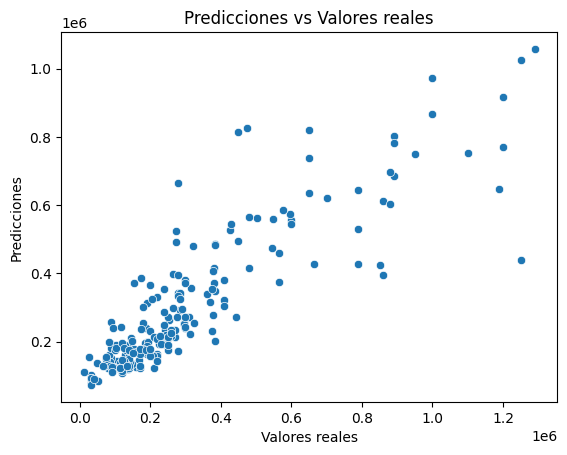

In [63]:
from sklearn.model_selection import train_test_split 

# Las columnas de las features (X)

X = df[['municipio', 'tipo_vivienda', 'habitaciones', 'metros_cuadrados',
       'aseos', 'planta', 'garaje', 'zona_centro', 'ascensor', 'piscina',
       'reformado', 'terraza', 'aire_acondicionado']]

# La columna del target (y)
y = df["precio"]

# Dividimos
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, random_state=42) 

print("Total shape:", X.shape)
print("Train features shape (X):", X_train.shape)
print("Train target shape (y):", y_train.shape)
print("Test features shape (X):", X_test.shape)
print("Test target shape (y):", y_test.shape)
print()

from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Configura el BaggingRegressor con un DecisionTreeRegressor como base
bagging = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),  # Modelo base inicial
    random_state=100,  # Para reproducibilidad
    n_jobs=-1  # Paralelización
)

# Define el rango de parámetros para optimizar
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
    'bootstrap': [True, False],
    'estimator__max_depth': [10, 15, 20],  # Añadir más valores
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 5]
}

# Configura el RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=bagging, 
    param_distributions=param_distributions, 
    n_iter=50,  # Número de combinaciones aleatorias a probar
    scoring='neg_mean_squared_error', 
    cv=5, 
    n_jobs=-1, 
    verbose=1,
    random_state=42
)

# Ajusta los datos
random_search.fit(X_train, y_train)

# Obtén los mejores parámetros
print("Mejores parámetros:", random_search.best_params_)

# Evaluación del modelo con los mejores parámetros
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("-----------> MAE:", mae)
print("-----------> MAPE:", mape)
print("-----------> RMSE:", rmse)
print("-----------> R2:", r2)

# Visualización de resultados
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales")
plt.show()

### El mejor Score, en el **TESTER 3 (Bagging) con R2: 0.7962861233449021**

### ***Seguimos probando con GradientBoostingRegressor()***